# User Churn Prediction

In this project, I use supervised learning models to identify customers who are likely to stop using service in the future. Furthermore, I analyze top factors that influence user retention.

## Contents

<ul>
<li>[Part 1: Data Exploration](#Part-1:-Data-Exploration)
<li>[Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
<li>[Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)
<li>[Part 4: Feature Selection](#Part-4:-Feature-Selection)
<li>[Part 5: Use Probabilities as Prediction Results](#Part-5:-Use-Probabilities-as-Prediction-Results)
</ul>

# Part 1: Data Exploration

### Part 1.1: Understand the Raw Dataset

In [60]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

churn_df = pd.read_csv('../data/churn.all')

In [61]:
churn_df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [62]:
print "Num of rows: " + str(churn_df.shape[0]) # row count
print "Num of columns: " + str(churn_df.shape[1]) # col count

Num of rows: 5000
Num of columns: 21


### Part 1.2: Data cleaning

Remove Extra Whitespace

In [63]:
churn_df['voice_mail_plan'][0]

' yes'

In [64]:
churn_df['voice_mail_plan'] = churn_df['voice_mail_plan'].map(lambda x: x.strip())
churn_df['intl_plan'] = churn_df['intl_plan'].map(lambda x: x.strip())
churn_df['churned'] = churn_df['churned'].map(lambda x: x.strip())

### Part 1.3:  Understand the features

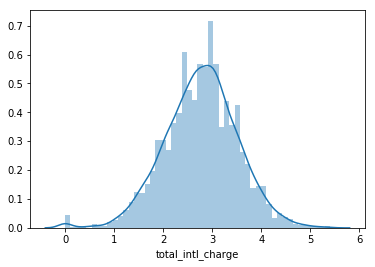

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

sb.distplot(churn_df['total_intl_charge'], kde=True)

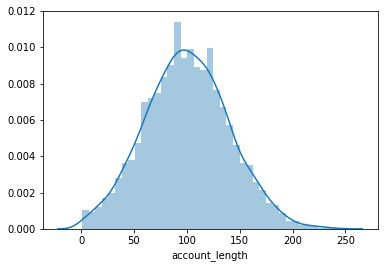

In [66]:
sb.distplot(churn_df['account_length'],kde=True)

In [67]:
# churn_df.head()

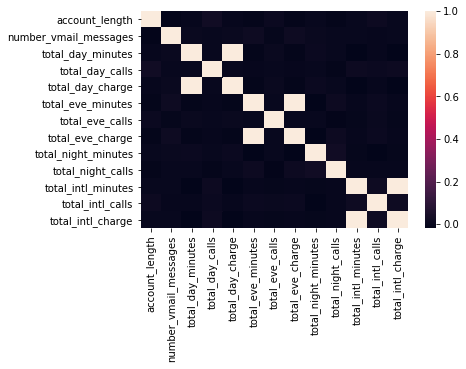

In [68]:
corr = churn_df[["account_length", "number_vmail_messages", "total_day_minutes",
                    "total_day_calls", "total_day_charge", "total_eve_minutes",
                    "total_eve_calls", "total_eve_charge", "total_night_minutes",
                    "total_night_calls", "total_intl_minutes", "total_intl_calls",
                    "total_intl_charge"]].corr()

sb.heatmap(corr)

In [69]:
corr

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,total_intl_charge
account_length,1.000000,-0.014575,-0.001017,0.028240,-0.001019,-0.009591,0.009143,-0.009587,0.000668,-0.007825,0.001291,0.014277,0.001292
number_vmail_messages,-0.014575,1.000000,0.005381,0.000883,0.005377,0.019490,-0.003954,0.019496,0.005541,0.002676,0.002463,0.000124,0.002505
total_day_minutes,-0.001017,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010760,0.011799,0.004236,-0.019486,-0.001303,-0.019415
total_day_calls,0.028240,0.000883,0.001935,1.000000,0.001936,-0.000699,0.003754,-0.000695,0.002804,-0.008308,0.013097,0.010893,0.013161
total_day_charge,-0.001019,0.005377,1.000000,0.001936,1.000000,-0.010747,0.008129,-0.010757,0.011801,0.004235,-0.019490,-0.001307,-0.019419
total_eve_minutes,-0.009591,0.019490,-0.010750,-0.000699,-0.010747,1.000000,0.002763,1.000000,-0.016639,0.013420,0.000137,0.008388,0.000159
total_eve_calls,0.009143,-0.003954,0.008128,0.003754,0.008129,0.002763,1.000000,0.002778,0.001781,-0.013682,-0.007458,0.005574,-0.007507
total_eve_charge,-0.009587,0.019496,-0.010760,-0.000695,-0.010757,1.000000,0.002778,1.000000,-0.016649,0.013422,0.000132,0.008393,0.000155
total_night_minutes,0.000668,0.005541,0.011799,0.002804,0.011801,-0.016639,0.001781,-0.016649,1.000000,0.026972,-0.006721,-0.017214,-0.006655
total_night_calls,-0.007825,0.002676,0.004236,-0.008308,0.004235,0.013420,-0.013682,0.013422,0.026972,1.000000,0.000391,-0.000156,0.000368


In [70]:
from scipy.stats import pearsonr
print pearsonr(churn_df['total_day_minutes'], churn_df['number_vmail_messages'])

(0.005381375960654535, 0.7036274686418728)


# Part 2: Feature Preprocessing

In [71]:
churn_df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [72]:
# Get ground truth data
y = np.where(churn_df['churned'] == 'True.',1,0)

# Drop some useless columns
to_drop = ['area_code','phone_number','churned']
churn_feat_space = churn_df.drop(to_drop, axis=1)

# yes and no have to be converted to boolean values
yes_no_cols = ["intl_plan","voice_mail_plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

In [73]:
#convert categorical variables to dummy variables
churn_dummies=pd.get_dummies(churn_feat_space,columns=['state'])

#convert data frame to num-py matrix
X=churn_dummies.as_matrix().astype(np.float)
X

array([[128.,   0.,   1., ...,   0.,   0.,   0.],
       [107.,   0.,   1., ...,   0.,   0.,   0.],
       [137.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [ 61.,   0.,   0., ...,   0.,   0.,   0.],
       [109.,   0.,   0., ...,   0.,   0.,   0.],
       [ 86.,   0.,   1., ...,   0.,   0.,   0.]])

In [74]:
churn_dummies.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print "Feature space holds %d observations and %d features" % X.shape
print "Unique target labels:", np.unique(y)

Feature space holds 5000 observations and 68 features
Unique target labels: [0 1]


# Part 3: Model Training and Result Evaluation

### Part 3.1: K-fold Cross-Validation

In [76]:
from sklearn.cross_validation import KFold

#This program does 5-fold. It saves the result at each time as different parts of y_pred. 
#In the end, it returns the y_pred as the result of all the five 5-fold.
def run_cv(X,y,clf_class,**kwargs):
    #X is the denpendent variables, y is the response variable
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    clf = clf_class(**kwargs)
    # Iterate through folds
    #train_index, and test_index should be lists which holds randomly chosen data
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    #get a whole pred from the orignal data
    return y_pred

### Part 3.2: Run Supervised Learning Models and Calculate Accuracy

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn import svm

def accuracy(y_true,y_pred):
    return np.mean(y_true == y_pred) # NumPy interpretes True and False as 1. and 0.

LR_CV_result = run_cv(X,y,LogisticRegression)
RF_CV_result = run_cv(X,y,RandomForestClassifier)
KNN_CV_result = run_cv(X,y,KNeighborsClassifier) #Default: n_neighbors=5

#SVM, slow
svm = svm.SVC(kernel='linear')
clf.fit(X, y)
SVM_result=clf.predict(X)

In [78]:
print "Logistic Regression (L2 is default): " + str(accuracy(y, LR_CV_result))
print "Random forest: " + str(accuracy(y, RF_CV_result))
print "K-nearest-neighbors: " + str(accuracy(y, KNN_CV_result))
print "SVM: " + str(accuracy(y, SVM_result))

Logistic Regression (L2 is default): 0.8664
Random forest: 0.9284
K-nearest-neighbors: 0.8632
SVM: 0.8586


In [79]:
#Show the details of prediction results
churn_df_LR_CV = churn_df
churn_df_LR_CV['LR_Predicted_churned'] = LR_CV_result == 1
churn_df_LR_CV[churn_df_LR_CV.columns[-2:]].head(10)

,churned,LR_Predicted_churned
0,False.,False
1,False.,False
2,False.,False
3,False.,True
4,False.,True
5,False.,False
6,False.,False
7,False.,False
8,False.,False
9,False.,True


### (Optional) Part 3.3: Use Grid Search to Find Optimal Parameters

#### Part 3.3.1: Find Optimal Parameters - LogisticRegression

In [80]:
def print_grid_search_metrics(gs):
    print "Best score: %0.3f" % gs.best_score_
    print "Best parameters set:"
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [81]:
from sklearn.grid_search import GridSearchCV
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5, verbose=0, refit=False)
Grid_LR.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=False, scoring=None, verbose=0)

In [82]:
print_grid_search_metrics(Grid_LR)

Best score: 0.864
Best parameters set:
	C: 10
	penalty: 'l1'


In [83]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(LogisticRegression(C=1,penalty='l1'), X, y, cv=5)
print "Logistic Regression 5-fold cross validation accuracy: " + str(np.mean(score))

Logistic Regression 5-fold cross validation accuracy: 0.8641996901996901


#### Part 3.3.2: Find Optimal Parameters: KNN

In [84]:
from sklearn.grid_search import GridSearchCV
parameters = {
    'n_neighbors':[3,6,7,8,10] 
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5, verbose=1, refit=False)
Grid_KNN.fit(X, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   25.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 6, 7, 8, 10]},
       pre_dispatch='2*n_jobs', refit=False, scoring=None, verbose=1)

In [85]:
print_grid_search_metrics(Grid_KNN)

Best score: 0.865
Best parameters set:
	n_neighbors: 7


In [86]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(KNeighborsClassifier(n_neighbors=7),X,y,cv=5)
print "5-fold cross validation accuracy: " + str(np.mean(score))

5-fold cross validation accuracy: 0.8646004918004918


### Part 3.4: Calculate Confusion Matrix (Precision, Recall, Accuracy)

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print classifier
    print "Accuracy is " + str(accuracy)
    print "Precision is " + str(precision)
    print "Recall is " + str(recall)

def draw_confusion_matrices(confusion_matricies,class_names):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

[0 1]
Random Forest
Accuracy is 0.9284
Precision is 0.9225181598062954
Recall is 0.5388967468175389


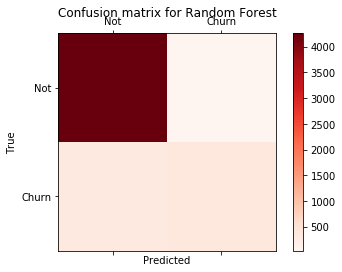

K-Nearest-Neighbors
Accuracy is 0.8632
Precision is 0.6352941176470588
Recall is 0.07637906647807638


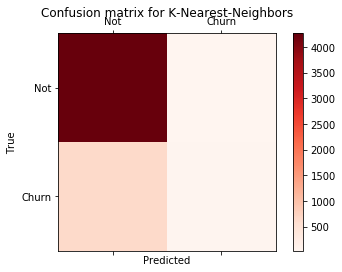

Logisitic Regression
Accuracy is 0.8664
Precision is 0.5674740484429066
Recall is 0.23196605374823195


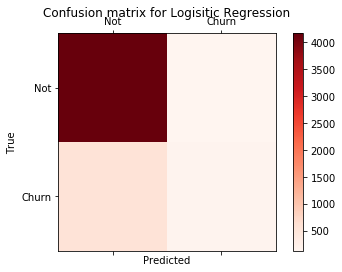

SVM
Accuracy is 0.8586
Precision is nan
Recall is 0.0


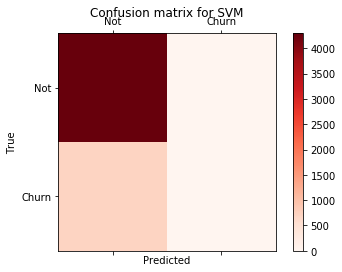

In [90]:
%matplotlib inline

y = np.array(y)
class_names = np.unique(y)
print class_names

confusion_matrices = [
    ("Random Forest", confusion_matrix(y,RF_CV_result)),
    ("K-Nearest-Neighbors", confusion_matrix(y,KNN_CV_result)),
    ("Logisitic Regression", confusion_matrix(y,LR_CV_result)),
    ('SVM',confusion_matrix(y,SVM_result))
]

draw_confusion_matrices(confusion_matrices,class_names)

# Part 4: Feature Selection

### Part 4.1:  Logistic Regression Model - Feature Selection Discussion 

The corelated features that we are interested in: (total_day_minutes, total_day_charge), (total_eve_minutes, total_eve_charge), (total_intl_minutes, total_intl_charge).

#### Part 4.1.1 - Compare Feature Coefficients

In [91]:
LRmodel_l1 = LogisticRegression(penalty="l1")
LRmodel_l1.fit(X, y)
LRmodel_l1.coef_[0]
print "Logistic Regression (L1) Coefficients"
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l1.coef_[0]), \
                      churn_feat_space.columns), key=lambda (k,v):(-abs(k),v)):
    print v + ": " + str(k)

Logistic Regression (L1) Coefficients
intl_plan: -0.8704
total_intl_charge: 0.6876
account_length: 0.6468
number_vmail_messages: 0.448
voice_mail_plan: 0.3999
total_day_calls: 0.2979
total_day_charge: 0.2147
total_intl_minutes: -0.1669
total_eve_calls: 0.157
total_eve_charge: 0.1313
total_intl_calls: 0.131
total_night_charge: 0.1147
total_night_calls: 0.0786
number_customer_service_calls: -0.0747
state: 0.0609
total_day_minutes: 0.0583
total_night_minutes: -0.0417
total_eve_minutes: -0.0248


In [92]:
LRmodel_l2 = LogisticRegression(penalty="l2")
LRmodel_l2.fit(X, y)
LRmodel_l2.coef_[0]
print "Logistic Regression (L2) Coefficients"
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l2.coef_[0]), \
                      churn_feat_space.columns), key=lambda (k,v):(-abs(k),v)):
    print v + ": " + str(k)

Logistic Regression (L2) Coefficients
intl_plan: -0.8981
total_intl_charge: 0.6885
account_length: 0.6479
voice_mail_plan: 0.4276
number_vmail_messages: 0.3777
total_day_calls: 0.3694
total_eve_calls: 0.1871
total_day_charge: 0.1869
total_intl_minutes: -0.1687
total_intl_calls: 0.1281
total_night_charge: 0.1193
total_eve_charge: 0.11
total_night_calls: 0.1021
number_customer_service_calls: -0.073
state: 0.063
total_day_minutes: 0.0608
total_night_minutes: -0.0438
total_eve_minutes: -0.027


#### Part 4.1.2 - Use Recursive Feature Elimination (RFE)

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.

In [93]:
from sklearn.feature_selection import RFE

rfe_l1 = RFE(LRmodel_l1, n_features_to_select=5) # If None, half of the features are selected.
rfe_l1.fit(X, y)
print "Logistic Regression (L1) RFE Result"
for k,v in sorted(zip(map(lambda x: round(x, 4), rfe_l1.ranking_), churn_feat_space.columns)):
    print v + ": " + str(k)

Logistic Regression (L1) RFE Result
account_length: 1.0
intl_plan: 1.0
number_vmail_messages: 1.0
total_intl_charge: 1.0
voice_mail_plan: 1.0
total_eve_calls: 2.0
total_intl_calls: 3.0
total_night_calls: 4.0
total_intl_minutes: 6.0
number_customer_service_calls: 18.0
total_day_charge: 21.0
state: 22.0
total_day_calls: 24.0
total_eve_charge: 28.0
total_day_minutes: 29.0
total_night_minutes: 32.0
total_night_charge: 39.0
total_eve_minutes: 43.0


In [94]:
from sklearn.feature_selection import RFE
rfe_l2 = RFE(LRmodel_l2, n_features_to_select=5) # If None, half of the features are selected.
rfe_l2.fit(X, y)
print "Logistic Regression (L2) RFE Result"
for k,v in sorted(zip(map(lambda x: round(x, 4), rfe_l2.ranking_), churn_feat_space.columns)):
    print v + ": " + str(k)

Logistic Regression (L2) RFE Result
account_length: 1.0
intl_plan: 1.0
number_vmail_messages: 1.0
total_intl_charge: 1.0
voice_mail_plan: 1.0
total_day_calls: 2.0
total_eve_calls: 3.0
total_intl_calls: 4.0
total_eve_charge: 5.0
total_day_charge: 7.0
total_intl_minutes: 8.0
total_night_charge: 12.0
total_night_calls: 17.0
number_customer_service_calls: 21.0
state: 27.0
total_day_minutes: 30.0
total_night_minutes: 32.0
total_eve_minutes: 48.0


### Part 4.2:  Random Forest Model - Feature Importance Discussion

In [95]:
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), churn_feat_space.columns), reverse=True):
    print v + ": " + str(k)

Feature importance ranking by Random Forest Model:
number_vmail_messages: 0.1589
total_day_calls: 0.1206
total_intl_charge: 0.1096
account_length: 0.059
total_eve_calls: 0.0587
total_day_charge: 0.0513
total_eve_charge: 0.0435
total_intl_minutes: 0.0431
total_intl_calls: 0.0381
total_night_calls: 0.0351
total_night_minutes: 0.0348
total_night_charge: 0.0345
state: 0.0327
total_day_minutes: 0.0288
total_eve_minutes: 0.0286
voice_mail_plan: 0.0259
intl_plan: 0.0152
number_customer_service_calls: 0.0009


# Part 5: Use Probabilities as Prediction Results

RandomForestClassifier, KNeighborsClassifier and LogisticRegression have predict_prob() function 

In [96]:
def run_prob_cv(X, y, clf_class, roc=False, **kwargs):
    kf = KFold(len(y), n_folds=5, shuffle=True)
    y_prob = np.zeros((len(y),2))
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        # Predict probabilities, not classes
        y_prob[test_index] = clf.predict_proba(X_test)
    return y_prob

In [97]:
from collections import defaultdict
true_prob = defaultdict(float)

pred_prob = run_prob_cv(X, y, RandomForestClassifier, n_estimators=10)
pred_churn = pred_prob[:,1]
is_churn = (y == 1)

counts = pd.value_counts(pred_churn)
for prob in counts.index:
    true_prob[prob] = np.mean(is_churn[pred_churn == prob])
true_prob = pd.Series(true_prob)

In [98]:
EvaResults = pd.concat([counts,true_prob], axis=1).reset_index()
EvaResults.columns = ['pred_prob', 'pred_count', 'true_prob']
EvaResults

,pred_prob,count,true_prob
0,0.0,2524,0.024960
1,0.1,1160,0.025000
2,0.2,425,0.063529
3,0.3,194,0.195876
4,0.4,127,0.464567
5,0.5,100,0.600000
6,0.6,123,0.796748
7,0.7,112,0.919643
8,0.8,113,0.964602
9,0.9,81,0.987654
